# **Выбор значимых признаков. Теоретическая часть.**

Рассмотрим результат из статье [1] Jan Mielniczuk, Pawel Teisseyre.
    
Будем рассматривать  $p$-тое количество признаков $X_{1}, \ldots, X_{p}$ и целевая классовая величина(отклик) - $Y$. Пусть $X_{S}$ - подмножество $X_{1}, \ldots, X_{p}$,  $S \subset\{1, \ldots, p\}$. Определим $p\left(x_{j}\right):=P\left(X_{j}=x_{j}\right), x_{j} \in \mathcal{X}_{j}$ , где $\mathcal{X}_{j}$ - область значений $X_{j}$ и $\left|\mathcal{X}_{j}\right|$ - мощность множества(конечно). Область значений классовой величины - $\mathcal{Y}$(конечно). Совместная \\
вероятность - $p\left(x_{i}, x_{j}\right)=P\left(X_{i}=x_{i}, X_{j}=\right.$ $\left.x_{j}\right)$.  $\hat{p}\left(x_{j}\right)$ - обозначение оценки $p\left(x_{j}\right)$.
  
  

Задача - зная значения признаков $ X_{1}, \ldots, X_{p}$, предположить значение $Y$. Например, задача можем сводиться к вопросу о $ P(Y=y| X_1 = x_1, \cdots, X_p = x_p)$.


По известному набору наблюдений необходимо найти зависимость отклика от значений признаков.

Однако, наш отклик Y может не зависить от существенной части признаков, либо же иметь пренебрежительно слабую зависимость. Рассмотрение всех признаков может быть существенно затруднено, например, в силу высоких вычисленных требований в виде экспоненцильного роста сложности.

Цель - выбрать наиболее подходящие признаки.

Однако, перебор по всем признаков является крайне затратным, так как сложность растет экспоненциально от числа признаков.

Следовательно, можно перейти к последовательному выбору признаков:
$$ \arg \max _{j \in S^{c}}\left[I\left(X_{S \cup\{j\}}, Y\right)-I\left(X_{S}, Y\right)\right]=\arg \max _{j \in S^{c}} I\left(X_{j}, Y \mid X_{S}\right) $$

Разложим условную совместную информацию через информации многостороннего взаимодействия:
\begin{align*}
& I\left(X_{S \cup\{j\}}, Y\right)-I\left(X_{S}, Y\right) \\
&= I\left(X_{j}, Y \mid X_{S}\right)=\sum_{k=0}^{|S|} \sum_{\left\{i_{1}, \ldots, i_{k}\right\} \subseteq S} I I\left(X_{i_{1}}, \ldots, X_{i_{k}}, X_{j}, Y\right) \\
& \quad= I\left(X_{j}, Y\right)+\sum_{i \in S} I I\left(X_{i}, X_{j}, Y\right)+\sum_{i_{1}, i_{2} \in S: i_{1}<i_{2}} I I\left(X_{i_{1}}, X_{i_{2}}, X_{j}, Y\right) \\
& + \ldots+I I\left(X_{i_{1}}, \ldots, X_{i_{|S|}}, X_{j}, Y\right) \tag{1}
\end{align*}

Для упрощения вычислений можно взять второй порядок приближения условной совместной информации:

\begin{align*}
J\left(X_{j}, S\right) & =I\left(X_{j}, Y\right)+\sum_{i \in S} I I\left(X_{i}, X_{j}, Y\right) \\
& =I\left(X_{j}, Y\right)+\sum_{i \in S}\left[I\left(Y, X_{j} \mid X_{i}\right)-I\left(Y, X_{j}\right)\right] \\
& =I\left(X_{j}, Y\right)(1-|S|)+\sum_{i \in S} I\left(Y, X_{j} \mid X_{i}\right) \tag{2}
\end{align*}



На практике приближение выше второго использовать затруднительно. Для $r$-того порядка приближения необходимо оценивать  $(r + 1)$-мерные вероятности. Пусть  $n$ - число наблюдений, для любого $i$ - $|\mathcal{X}_i| = b$, следовательно, всего $b^{r + 1}$ - возможных комбинаций. $n/b^{r + 1}$ - в среднем наблюдений на комбинацию.
    
    
Например, если $n = 1000$, $b = 5$, $r = 2$, то $n/b^{r + 1} = 8$. Если  $r = 3$, то $n/b^{r + 1} = 1.6$. То есть не удастся приближенно оценить вероятности.

Авторы строят последовательный выбор признаков. Необходима точка остановки, на которой выбор предполагаемых значимых признаков будет окончен.

Предположим выбрали S множество индексов признаков. Тогда выбор признаков останавливается при $I\left(Y, X_{j} \mid X_{S}\right)=0$ для любого $j \in S^{c}$. Пользуемся приближением второго порядка.

Пусть $S_{k}$ - множество индексов, выбранных на $k$-том шаге, где $S_{0}=\emptyset$. На $k$-том шаге определим $S_{k+1}=S_{k} \cup\left\{j_{k}\right\}$ такое, что $j_{k}=$ $\arg \max _{j \in S_{k}^{c}} J\left(X_{j}, S_{k}\right)$. Таким образом момент остановки в приближении:

$t:=\arg \min _{1 \leq k \leq p} (J\left(X_{j}, S_{k}\right)=0), \forall j \in S_{k}^{c}$.


Так как мы не знаем распределений, нужны оценки.

\begin{align*}
\hat{J}\left(X_{j}, S_{k}\right) & =\hat{I}\left(X_{j}, Y\right)+\sum_{i \in S_{k}} \hat{I}\left(X_{i}, X_{j}, Y\right) \\
& =\hat{I}\left(X_{j}, Y\right)+\sum_{i \in S_{k}}\left[\hat{I}\left(Y, X_{j} \mid X_{i}\right)-\hat{I}\left(Y, X_{j}\right)\right] \\
& =\hat{I}\left(X_{j}, Y\right)\left(1-\left|S_{k}\right|\right)+\sum_{i \in S_{k}} \hat{I}\left(Y, X_{j} \mid X_{i}\right) \tag{3}
\end{align*}


Заметим, что при $J\left(X_{j}, S_{k}\right)=0$, может выполняться $\hat{J}\left(X_{j}, S_{k}\right)>0$.
    
Цель - построить приближение распределения $2 n \hat{J}\left(X_{j}, S_{k}\right)$ при гипотезе, что   $X_{j} \perp Y \mid X_{S_{k}}$; и ввести правило остановки $\hat{t}$, основанное на кватилях распределения.







  

# **Теорема.**

Пусть $X, Y$ и $Z$ - случайные величины, принимающие значения в  $|\mathcal{X}|$, $|\mathcal{Y}|$ и $|\mathcal{Z}|$, соответственно. Предположим, что $Y$ и $Z$ независимы при условии $X$. Тогда

$2 n \hat{I}(Y, Z \mid X) \approx \sum_{i=1}^{|\mathcal{X}|} W_{i}$  , где $W_{i}$ имеет $\chi^{2}$ асимптотическое распределение со $(|\mathcal{Y}|-1)(|\mathcal{Z}|-1)$ степенями свободы и $\approx$ - означает, что обе части отличаются только на величину, стремящуюся к нулю по вероятности.


$\square$ Для упращения записи $\hat{p}_{i j k}=\hat{p}\left(X=x_{i}, Y=\right.$ $\left.y_{j}, Z=z_{k}\right), \hat{p}_{i j}=\hat{p}\left(X=x_{i}, Y=y_{j}\right)$ и т.д.. Запишем, используя определение условной совместной информации:

$2 n \hat{I}(Y, Z \mid X)=2 n \sum_{i, j, k} \hat{p}_{i j k} \log \frac{\hat{p}_{i j k} \hat{p}_{i}}{\hat{p}_{i j} \hat{p}_{i k}}$

\begin{equation*}
=2 n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k} \hat{p}_{i j k} \hat{p}_{i} \log \left(1+\frac{\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}}{\hat{p}_{i j} \hat{p}_{i k}}\right) \tag{4}
\end{equation*}


Используя $\log (1+x)=x-x^{2} / 2+O\left(x^{3}\right)$ для малых $x$, получим:


\begin{align*}
\log \left(1+\frac{\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}}{\hat{p}_{i j} \hat{p}_{i k}}\right)= & \frac{\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}}{\hat{p}_{i j} \hat{p}_{i k}}-\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}} \\
& +O\left(\frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{3}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{3}}\right) \tag{5}
\end{align*}

Вставим выражение выше в (4), видим, что член содержащий последний член в (5) ограничен некоторой $C>0$ как


\begin{align*}
C \times & 2 n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{3}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{3}} \\
\leq & C \times 2 n \sum_{i} \frac{1}{\hat{p}_{i}} \times \frac{\max _{j, k}\left|\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right|}{\min _{j, k}\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}} \\
= & C \times 2 \sum_{i} \frac{1}{\hat{p}_{i}^{2}} \times \frac{\max _{j, k}\left|\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right|}{\min _{j, k}\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}} \\
& \times n \hat{p}_{i} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}} \tag{6}
\end{align*}

\begin{align*}
= & C \times 2 \sum_{i} \frac{1}{\hat{p}_{i}^{2}} \times \frac{\max _{j, k}\left|\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right|}{\min _{j, k}\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}} \\
& \times n \hat{p}_{i} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}} \tag{6}
\end{align*}

В силу условной независимости и сходимости $\hat{p}_{i j} \rightarrow$ $p_{i j}>0, \hat{p}_{i k} \rightarrow p_{i k}>0$ имеем
\begin{align*}
\left|\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right| \rightarrow\left|p_{i j k} p_{i}-p_{i j} p_{i k}\right|=0 \tag{7}
\end{align*}

при $n \rightarrow \infty$.

В силу  (7) и (10) ниже, последний член в (6) -  сумма двух членов таких, что первый член сходится к нулю, и второй член имеет распределение хи-квадрат. Следовательно, из теоремы Слуцкого следует, что оценка в (6) сходится по вероятности к  0 , когда $n \rightarrow \infty$. Таким образом  $2 n \hat{I}(Y, Z \mid X)$ примерно равен


\begin{align*}
& 2 n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k}\left[\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}+\hat{p}_{i j} \hat{p}_{i k}\right] \\
& \times\left[\frac{\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}}{\hat{p}_{i j} \hat{p}_{i k}}-\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}\right] \\
& =2 n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k}\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}+\frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}}\right. \\
& \left.-\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}}+\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{3}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}\right) \\
\end{align*}

\begin{align*}
& =2 n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k}\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}+\frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}}\right. \\
& \left.-\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}}+\frac{1}{2} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{3}}{\left(\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}\right) \\
& \approx n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k}\left( 2(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}) +\frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}}\right) \\
& =n \sum_{i} \frac{1}{\hat{p}_{i}} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}} \tag{8}
\end{align*}

где приближение в (8) получено аналогично как в (6), и последнее равенство следует из то, что  $\sum_{j, k} (\hat{p}_{i j k} \hat{p}_{i}-$
$\hat{p}_{i j} \hat{p}_{i k})=0$. Последнее полученное выражение равно


\begin{align*}
& n \sum_{i} \hat{p}_{i} \sum_{j, k} \frac{\left(\hat{p}_{i j k} / \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k} / \hat{p}_{i}^{2}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k} / \hat{p}_{i}^{2}} \\
& \quad=\sum_{i} n_{i} \sum_{j, k} \frac{\left(\hat{p}_{i j k} / \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k} / \hat{p}_{i}^{2}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k} / \hat{p}_{i}^{2}}=: \sum_{i=1}^{|\mathcal{X}|} W_{i} \tag{9}
\end{align*}


где $n_{i}=n \hat{p}_{\text {i }}$.

Заметим, что $W_{i}$ есть хи-квадрат статистика для тестирования независимости  $Y$ и $Z$ при $X=x_{i}$, которая при предположении независимости $Y$ и $Z$ при $X$ имеет асомптотическое $\chi^{2}$ распределение со $(|\mathcal{Y}|-1)(|\mathcal{Z}|-1)$ степенями свободы

\begin{align*}
    & W_{i}=n_{i} \sum_{j, k} \frac{\left(\hat{p}_{i j k} \hat{p}_{i}-\hat{p}_{i j} \hat{p}_{i k}\right)^{2}}{\hat{p}_{i j} \hat{p}_{i k}} \approx \chi_{(|\mathcal{Y}|-1)(|\mathcal{Z}|-1)}^{2} \tag{10} \\
\end{align*}

в силу (Теорема 6.9, Shao Mathematical Statistics). Автором было показано, что число степеней свободы предельного $\chi^{2}$ распределения равно $p-s-1$, где $p=|\mathcal{Y}||\mathcal{Z}|$ и $s=(|\mathcal{Y} \mid-1)+(|\mathcal{Z}|-1)$, при предположении условной независимости $(|\mathcal{Y}|-1)+(|\mathcal{Z}|-1)$ условных вероятностей $Y$ и $Z$ при $X=x_{i}$ нужно определить, чтобы определить условное распределение $(Y, Z)$ при $X=x_{i}$. Таким образом общее число степеней свободы равно $|\mathcal{Y}||\mathcal{Z}|-(|\mathcal{Y}|-1)-(|\mathcal{Z}|-1)-1=(|\mathcal{Y}|-1)(|\mathcal{Z}|-1)$. $\square$

# Дополнительные предположения.

Также предположим, что при условной независимости $Y$ и $Z$ при $X$ величины $W_i s$ асимптотически независимы и сумма $\sum_{i=1}^{|\mathcal{X}|} W_i$ имеет хи-квадрат распределение со  $|\mathcal{X}|(|\mathcal{Y}|-1)(|\mathcal{Z}|-1)$ степенями свободы. Это предположение верно, например, при $|\mathcal{Y}|=|\mathcal{Z}|=2$ и $|\mathcal{X}|$ произвольный конечный ($[28])$.

Такие предположения применяются к  $\hat{I}\left(X_j, Y \mid X_i\right)$ в $\hat{J}\left(X_j, S\right)$ в (3). Тогда каждое $\hat{I}\left(X_j, Y \mid X_i\right)$ примерно имеет хи-квадрат распределение со $\left|\mathcal{X}_i\right|\left(\left|\mathcal{X}_j\right|-1\right)(|\mathcal{Y}|-1)$ степенями свободы. Следовательно, из (3)  и из факта, что $2 n \hat{I}\left(X_j, Y\right)$ примерно распределено как $\chi^2$  со $\left(\left|\mathcal{X}_j\right|-1\right)((|\mathcal{Y}|-1)$ степенями свободы, получается $2 n \hat{\jmath}\left(X_j, S\right)$ имеет хи-квадрат распределение с
$$
\begin{aligned}
d= & d(j,|S|)=\left(\left|\mathcal{X}_j\right|-1\right)(|\mathcal{Y}|-1) \sum_{i=1}^{|S|}\left|\mathcal{X}_i\right| \\
& +(1-|S|)\left(\left|\mathcal{X}_j\right|-1\right)(|\mathcal{Y}|-1)
\end{aligned}
$$
степенями своболы. Из выражения в теореме  математическое ожидание $2 n \hat{j}\left(X_j, S\right)$ примерно $d(j,|S|)$ .

Обоснованием для использования предположения об асимптотической независимости является результат из ([12]). А именно, Хан в [12] доказал, что при совместной независимости $X_i, X_j$ и $Y$ выражение $2 n \hat{I}\left(X_i, X_j, Y\right)$ примерно распределено как хи-квадрат с $\left(\left|\mathcal{X}_i\right|-1\right)\left(\left|\mathcal{X}_j\right|-1\right)(|\mathcal{Y}|-1)$ степенями свободы. Просуммируя степени свободы в (3), получается:
$$
\left(\mathcal{X}_j \mid-1\right)(|\mathcal{Y}|-1) \sum_{i=1}^{|S|}\left(\left|\mathcal{X}_i\right|-1\right)+\left(\left|\mathcal{X}_j\right|-1\right)(|\mathcal{Y}|-1)=d(j,|S|) .
$$



# Практическая часть.

Покажем результаты тестирования работы правила остановки. Будут проводиться эксперименты на симулированных данных. Далее будет приведён результат работы на примере базе данных рассылок спама Spambase (4601 наблюдений, 57 признаков).

При симуляции будут заданы зависимости от части сгенерированных признаков. Задача обнаружить их. Заранее зная их, можно оценить точность алгоритма.

Пусть $S_0=\emptyset$ и
$$
j_k=\operatorname{argmax}_{j \in S_k^c} 2 n \hat{\jmath}\left(X_j, S_k\right)
$$
номер кандидата с наибольшей информативностью (при $\left.k=0, j_0=\operatorname{argmax}_{j \in S_k^c} 2 n \hat{I}\left(X_j, Y\right)\right)$. Тогда $S_{k+1}=S_k \cup\left\{j_k\right\}$ и
$$
\hat{t}_{\text {chi}}=\operatorname{argmin}_{k=1, \ldots, p}\left\{2 n \hat{\jmath}\left(X_{j_k}, S_k\right) \leq \chi_{1-\alpha, d\left(S_k\right)}^2\right\}
$$
где $\alpha$ - квантиль. Будет далее предполагаться равным 0.05.

Алгоритм построения симудированных данных.



1. Генерируются независимые $X_1 \cdots X_p$ гауссовские величины(матожидание - 0, дисперсия - 1).
2. Генерируется бернуллиевская величина $Y$ с условной вероятностью $P(Y = 1| X_1, \cdots, X_p) = \sigma(X_M + f(X_M, X_L))$.
3. $M, L$ - подмножество индексов, $|M| = |L|$.
4. Далее выполняется процесс дискретизации непрерывных величин.

Далее $M$ - будем иметь нумерацию с 1 элемента(например, (1), (1,2), (1,2,3,4)). $L$ - следущие аналогично.

Функция $f$ будет представляться в виде:
1. $f_1(X_M, X_L) = \sum_i X_{M_i} X_{L_i}$
2. $f_2(X_M, X_L) = \sum_i max(X_{M_i} X_{L_i})$
3. $f_3(X_M, X_L) = \sum_i min(X_{M_i} X_{L_i})$
4. $f_4(X_M, X_L) = \sum_i I(X_{M_i} X_{L_i} < 0)$
5. $f_5(X_M, X_L) = \sum_i sgn(X_{M_i} X_{L_i})$
6. $f_6(X_M, X_L) = \sum_i I(X_{M_i} > X_{L_i})$

Эффективность будет оцениваться метрикой PSR(Positive Selection Ratio) - (число выбранных настоящих значимых признаков)/(общее число настоящих значимых признаков).


# Примеры.

In [ ]:
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from pyitlib import discrete_random_variable as drv
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
np.random.seed(42)


In [ ]:
from  FeatureSelection import Choice
from auxiliary import Plot_Features, test, Generate_Y

In [ ]:
N_ = 4000          # Число наблюдений
p = 100            # Общее число признаков
M_ = 2             # Число признаков в М
number_bins = 2    # Число бинов дискретизации
f_type = 1         # Номер функции зависимости

test(N_, p, M_, number_bins, f_type) # Вывод вычисленных номеров значимых признаков. 100% попадание

array([2, 3, 0, 1])

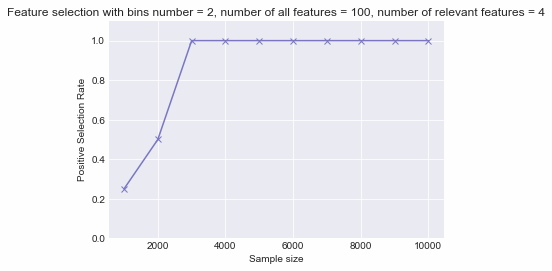

In [ ]:
p = 100            # Число наблюдений
M_ = 2             # Число признаков в М
number_bins = 2    # Число бинов дискретизации
min_N_ = 1000      # Начало отсчета числа наборов
max_N_ = 10000     # Конец отсчетв числа наборов
number_N_ = 10     # Число экспериментов
True_Features = np.array([0, 1, 2, 3])  # Настоящий набор значимых факторов
f_type = 1

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

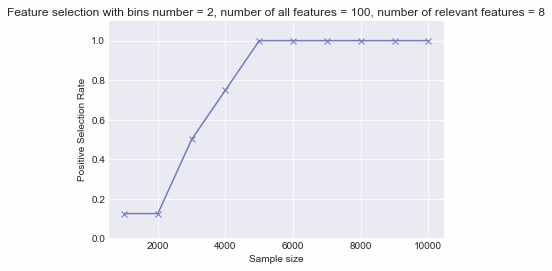

In [ ]:
p = 100                      # Аналогично
M_ = 4
number_bins = 2
min_N_ = 1000
max_N_ = 10000
number_N_ = 10
True_Features = np.linspace(0, 7, 8, dtype=int)
f_type = 1

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

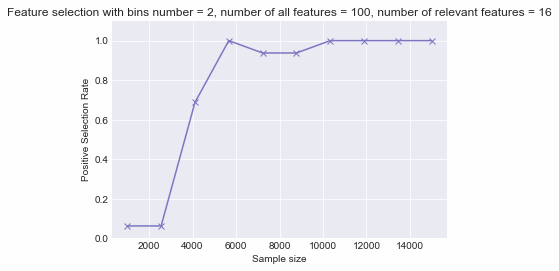

In [ ]:
p = 100                # Аналогично
M_ = 8
number_bins = 2
min_N_ = 1000
max_N_ = 15000
number_N_ = 10
True_Features = np.linspace(0, 15, 16, dtype=int)
f_type = 1

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

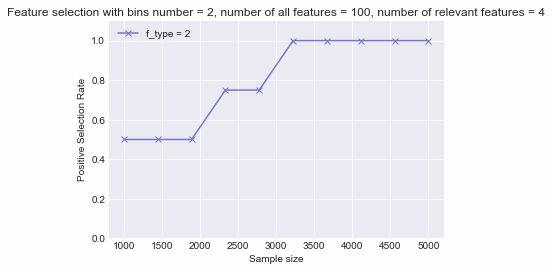

In [ ]:
p = 100                 # Аналогично
M_ = 2
number_bins = 2
min_N_ = 1000
max_N_ = 5000
number_N_ = 10
True_Features = np.linspace(0, 3, 4, dtype=int)
f_type = 2

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

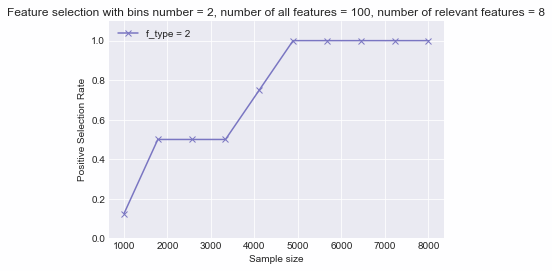

In [ ]:
p = 100                  # Аналогично
M_ = 4
number_bins = 2
min_N_ = 1000
max_N_ = 8000
number_N_ = 10
True_Features = np.linspace(0, 7, 8, dtype=int)
f_type = 2

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

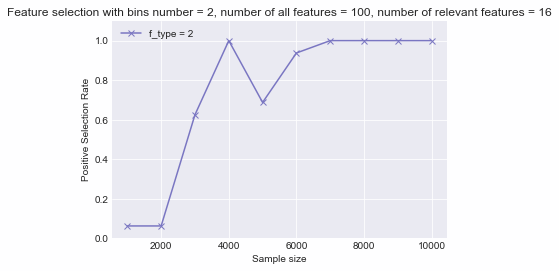

In [ ]:
p = 100                   # Аналогично
M_ = 8
number_bins = 2
min_N_ = 1000
max_N_ = 10000
number_N_ = 10
True_Features = np.linspace(0, 15, 16, dtype=int)
f_type = 2

Plot_Features(p, M_, number_bins, min_N_, max_N_, number_N_, True_Features, f_type)

In [ ]:
N_ = 10000                      # Аналогично
p = 400
M_ = 4
number_bins = 2
f_type = 1

test(N_, p, M_, number_bins, f_type)

array([1, 2, 3, 0])

# Эксперимент на реальных данных.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [ ]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [ ]:
col = np.array(X.columns)

In [ ]:
_X_ = np.array(X)
_y_ = np.reshape(np.array(y), (len(y), ))

In [ ]:
number_bins = 2
p = np.shape(_X_)[1]
N = np.shape(_X_)[0]
set_number = 4300

X_dim = number_bins
Y_dim = 2

dimensions = p * X_dim * (X_dim - 1) * (Y_dim - 1) + (1 - p) * (X_dim - 1) * (Y_dim - 1)


quantile =  chi2.ppf(0.95, dimensions)

ind_s = np.random.randint(0, N, size=set_number)

bins = np.quantile(_X_, np.arange(0, 1, (1/number_bins)))
X_b = np.digitize(_X_, bins)

for i in range(0, p):
    bins = np.quantile(_X_[:, i], np.arange(0, 1, (1/number_bins)))
    X_b[:, i] = np.digitize(_X_[:, i], bins)



X_b = (np.rint(X_b)).astype(int)
_y_ = (np.rint(_y_)).astype(int)

ind = Choice(X_b[ind_s, :], _y_[ind_s], quantile)
col[ind]

array(['word_freq_will', 'capital_run_length_longest', 'char_freq_(',
       'capital_run_length_total', 'word_freq_you',
       'capital_run_length_average', 'word_freq_your'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_b[ind_s, :][:, ind], _y_[ind_s])

res = np.setdiff1d(np.arange(0, p, 1, dtype=int), ind_s)

_y_predict = neigh.predict(X_b[res, :][:, ind])

# Точность прогноза классификации на выбранных значимых признаках.

In [ ]:

print('accuracy = ', 1 - np.mean(np.fabs(_y_[res] - _y_predict)))

accuracy =  0.7272727272727273
